<a href="https://colab.research.google.com/github/Maxime-Bakunzi/calculus-assignment/blob/main/Maxime_Guy_Bakunzi_Calculus_Assignment_%5BPLD_NUMBER%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Write a dynamic function to find the derivative of any function f(x)

# **Importing necessary Libraries**


In [50]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

We are using **sympy** library to symbolically compute the derivative of any given function.

In [51]:
#TO DO: Create a function that does a derivative for any function
def dy_dx(f):
  x = sp.symbols('x')
  derivative = sp.diff(f(x), x)
  return sp.lambdify(x, derivative, 'numpy')

After meeting with the error;

TypeError: **dy_dx() **takes 0 positional arguments but 1 was given.

we decided to modify the **dy_dx()** function to accept function **f** as an argument.

# Task 2: Test the derivative function written with an equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [52]:
def f(x):
  return x**5 - 10*x**3 + 20*x

df_dx = dy_dx(f)


# Print exmples for testing at some points
print(f"At the position 0: {df_dx(0)}")
print(f"At the position 1: {df_dx(1)}")

At the position 0: 20
At the position 1: -5


#Task 3: Plot a graph of the Equation must have 4 points (2 minimas and 2 maximas)

Create a visualization of the quadratic equation

Critical Points: [-2. -1.  0.  1.  2.]


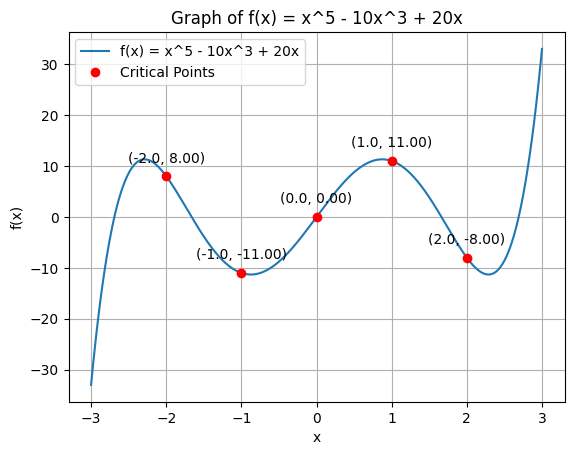

In [53]:
#Create an array of x values
x_values = np.linspace(-3, 3, 400)
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label = 'f(x) = x^5 - 10x^3 + 20x')

# Define the derivative function

def df(x):
  return 5*x**4 - 30*x**2 + 20

# Find the critical points
critical_points = fsolve(df, [-2, -1, 0, 1, 2])
y_critical = [f(x) for x in critical_points]
# Printing Crtical points
print("Critical Points:", critical_points)


# Plot critical points
plt.plot(critical_points, y_critical, 'ro', label = 'Critical Points')

# Annotate the critical points
for i, point in enumerate(critical_points):
  plt.annotate(f"({point}, {y_critical[i]:.2f})", (point, y_critical[i]), textcoords="offset points", xytext=(0, 10), ha= 'center')

# Adding labels and the title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) = x^5 - 10x^3 + 20x')
plt.legend()
plt.grid(True)
plt.show()

The graph of **f(x)=x^5 − 10(x^3) + 20x** clearly shows two minima at x = -1 and 2 and two maximum at x = -2 and 1. The critical points are well-identified, and the overall shape of the graph is as expected for a polynomial of degree 5. The function's behavior at large values of **∣x∣** aligns with the dominant  x^5 term, causing the function to rise sharply.

# Task 4: Create separate array of Minimas and maximas

To find the minima and maxima, we solve the equation where the derivative is zero(0).

In [54]:
# Printing Crtical points
print("Critical Points:", critical_points)

# Classify critical points
arr_minimas = []
arr_maximas = []

for point in critical_points:
  second_derivative = 20*(point**3) - (60*point)
  if second_derivative > 0:
    arr_minimas.append((point, f(point)))
  elif second_derivative < 0:
    arr_maximas.append((point, f(point)))


print(f'the array of minimas {arr_minimas} and the array of maximas is {arr_maximas}')



Critical Points: [-2. -1.  0.  1.  2.]
the array of minimas [(-1.0, -11.0), (2.0, -8.0)] and the array of maximas is [(-2.0, 8.0), (1.0, 11.0)]


Identify the global minima and maxima among the critical points.

In [55]:
Global_maxima =  max(arr_maximas, key=lambda t: t[1])
Global_minima =  min(arr_minimas, key=lambda t: t[1])

print(f'The global maxima is {Global_maxima}')
print(f'The global minima is {Global_minima}')

The global maxima is (1.0, 11.0)
The global minima is (-1.0, -11.0)


# **Visualize the Global Minima and Maxima**

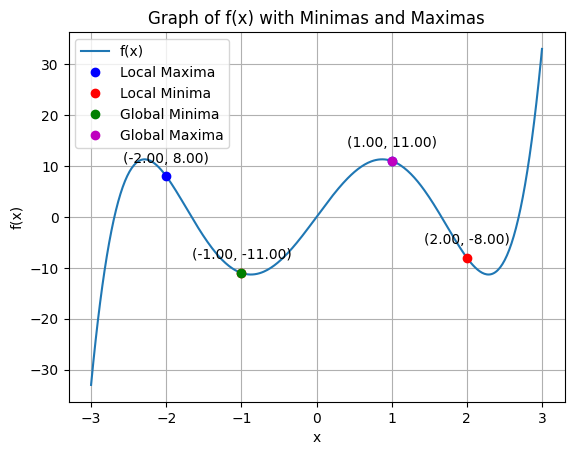

In [56]:
# Plot the function
plt.plot(x_values, y_values, label='f(x)')

# Mark critical pionts
for x, y in arr_maximas:
  plt.plot(x, y, 'bo', label = 'Local Maxima' if arr_maximas.index((x, y)) == 0 else "")

for x, y in arr_minimas:
  plt.plot(x, y, 'ro', label = 'Local Minima' if arr_minimas.index((x, y)) == 0 else "")

# Mark global minima and maxima
plt.plot(Global_minima[0], Global_minima[1], 'go', label= 'Global Minima')
plt.plot(Global_maxima[0], Global_maxima[1], 'mo', label= 'Global Maxima')

# Annotate points

for x, y in arr_minimas + arr_maximas:
  plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords = "offset points", xytext = (0,10), ha = 'center')

# Adding labels and the title
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of f(x) with Minimas and Maximas')
plt.legend()
plt.grid(True)
plt.show()

**Critical Points:** The function has two minima and two maxima.

**Global Extrema:** The function reaches its highest and lowest values at the global maxima and minima.

**Behavior at Infinity:** As x goes to both positive and negative infinity, the function values increase steeply due to the x^5 term.